# 3D wind speed prediction

In [1]:
# plot the results
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.size'] = 18  # You can set any numeric value here

# load the mspe data

k_clusters = [5000, 10000, 20000, 30000] # 1000
m_clusters = [60, 120, 180, 240, 300, 360, 420] #480, 540, 600

mspe_data = []

for k in k_clusters:
    mspe_data_k = []
    for m in m_clusters:
        file_name = f'./log/prediction_3d/conditional_simulation_k_{k}_m_{m}_theta_0.430000_0.002972_0.450000_seed_42.csv'
        data = pd.read_csv(file_name).head(1)['mspe'].values
        mspe_data_k.append(data)
    mspe_data.append(mspe_data_k)
mspe_data = np.array(mspe_data)[:, :, 0]
print(mspe_data.shape)

(4, 7)


In [2]:
markers = ['P', '*', 'd', 'X', '8']
colors = [
    "#3357FF",  # Royal blue
    "#33FFF6",  # Cyan
    "#8B4513",  # Saddle brown
    "#FF33F6",  # Magenta
    "#F6FF33",  # Yellow
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#FF69B4",   # Hot pink
]
linestyles = ['-.', '--', ':','-']

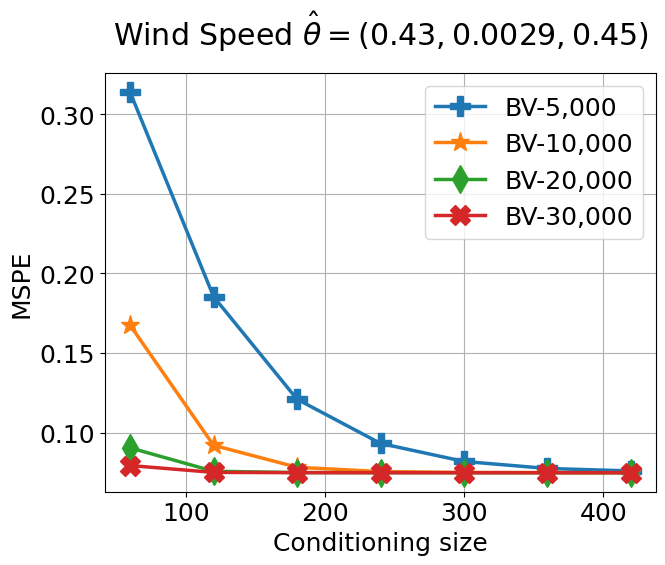

In [3]:
# plot the mspe data, multiple lines correspond to different k
plt.figure(figsize=(7, 6))

for i, k in enumerate(k_clusters):
    plt.plot(m_clusters, mspe_data[i], label=f'BV-{k:,}', linewidth=2.5, marker=markers[i], markersize=14)

plt.legend(
    # title='Number of blocks', title_fontsize=12, fontsize=10, 
    # loc='upper right', frameon=True
    )
plt.title(r'Wind Speed $\hat\theta = (0.43, 0.0029, 0.45)$', pad=20)
plt.xlabel('Conditioning size')
plt.ylabel('MSPE')

# plt.xscale('log')  # Use logarithmic scale for x-axis
# plt.yscale('log')  # Use logarithmic scale for y-axis

plt.grid(True)
plt.tick_params(axis='both', which='major')

plt.tight_layout()
plt.savefig('./fig/mspe_3d.pdf')
plt.show()

# 2D heatmap of svariance

In [17]:
# plot the svariance data in 3D 

# k = 5000
# m = 60
k = 30000
m = 420

data = pd.read_csv(f'./log/prediction_2d/conditional_simulation_k_{k}_m_{m}_theta_0.650000_0.001284_0.475000_seed_42.csv')

# do sub-sampling
data = data.sample(frac=1, random_state=42)

data.head()

,smean,svariance,x,y,z,mspe
119737,-0.524215,0.036918,34.1377,-75.2618,0,0.035847
72272,-0.550920,0.040335,39.7961,-76.6741,0,0.035847
158154,1.787270,0.035616,35.7294,-74.7888,0,0.035847
65426,-1.081330,0.033916,37.5794,-78.7434,0,0.035847
30074,-0.303163,0.033324,36.2961,-84.3402,0,0.035847


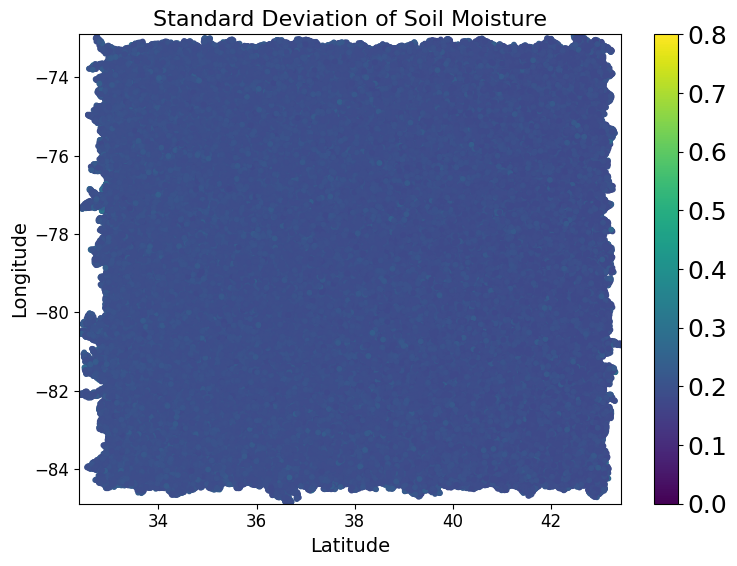

In [18]:
# plot heatmap of the svariance data
plt.figure(figsize=(8, 6))

# Create a scatter plot with color representing svariance
scatter = plt.scatter(data['x'], data['y'], c=np.sqrt(data['svariance']), cmap='viridis', s=10)

# set lim for x and y and svariance
plt.xlim(min(data['x']), max(data['x']))
plt.ylim(min(data['y']), max(data['y']))
plt.clim(0, 0.8)

plt.colorbar(scatter)
plt.title('Standard Deviation of Soil Moisture', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig(f'./fig/svariance_heatmap_2d_{k}_{m}.jpg', dpi=300)
plt.show()

In [6]:
# plot the results
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load the mspe data

k_clusters = [5000, 10000, 20000, 30000] # 1000
m_clusters = [60, 120, 180, 240, 300, 360, 420] #480, 540, 600

mspe_data = []

for k in k_clusters:
    mspe_data_k = []
    for m in m_clusters:
        file_name = f'./log/prediction_2d/conditional_simulation_k_{k}_m_{m}_theta_0.650000_0.001284_0.475000_seed_42.csv'
        data = pd.read_csv(file_name).head(1)['mspe'].values
        mspe_data_k.append(data)
    mspe_data.append(mspe_data_k)
mspe_data = np.array(mspe_data)[:, :, 0]
print(mspe_data.shape)

(4, 7)


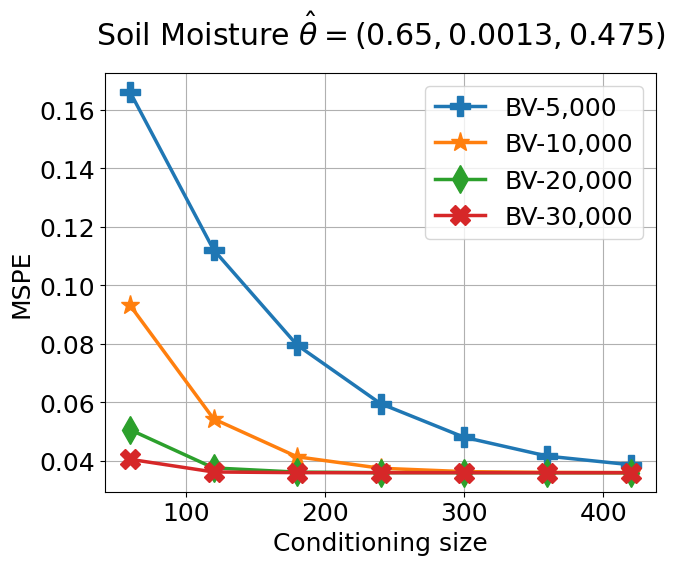

In [7]:
# plot the mspe data, multiple lines correspond to different k
plt.figure(figsize=(7, 6))

for i, k in enumerate(k_clusters):
    plt.plot(m_clusters, mspe_data[i], label=f'BV-{k:,}', linewidth=2.5, marker=markers[i], markersize=14)

plt.legend(
    # title='Number of blocks', title_fontsize=12, fontsize=10, 
    # loc='upper right', frameon=True
    )
plt.title(r'Soil Moisture $\hat\theta=(0.65, 0.0013, 0.475)$', pad=20)
plt.xlabel('Conditioning size')
plt.ylabel('MSPE')

# plt.xscale('log')  # Use logarithmic scale for x-axis
# plt.yscale('log')  # Use logarithmic scale for y-axis

plt.grid(True)
plt.tick_params(axis='both', which='major')

plt.tight_layout()
plt.savefig('./fig/mspe_2d.pdf')
plt.show()